# **AMAZON WEB SERVICES SALES ANALYSIS**
This dataset contains data from fictious B2B SaaS sales transactions, and therefore does not represent actual AWS data.

In [2]:
import numpy as np
import pandas as pd
import kagglehub
import os

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import anderson, kruskal, ks_2samp, spearmanr, linregress
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

# Background

Amazon Web Services (AWS) is a cloud service launched by Amazon in 2006, designed to provide solutions to customers facing challenges in data storage and security. Through AWS, Amazon offers globally accessible data centers, enabling users to manage and store information with enhanced flexibility and security. One of the flagship services provided is Software as a Service (SaaS) [(Amazon Web Services, 2024)](https://aws.amazon.com/about-aws/our-origins/).

In the SaaS industry, Amazon faces the need to remain competitive and adapt to market changes. The success of a SaaS business heavily relies on customer base growth, recurring revenue, and effective marketing strategies to retain and attract new customers. Therefore, a deep understanding of the factors influencing sales performance becomes crucial for Amazon.

As data analysts, we can explore product sales based on regions and industry segmentation to identify trends and customer preferences. This analysis will utilize [SaaS sales data](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales) to uncover significant patterns in sales performance, providing valuable insights for improvement strategies, and future product development.

# Business Problem

The company aims to understand the factors contributing to negative profit in SaaS product sales. This information can be useful for the company to identify new opportunities for improving SaaS sales.

The analysis will be conducted to answer the following questions:
1. How is the sales performance of each products?
2. What is the distribution of underperforming product sales?
3. What are the monthly sales and profit trends of underperforming product?
4. Are there differences in the profit of underperforming product across regions and segments?
5. What is the demand for underperforming product?
6. What are the monthly discount trends for underperforming product?

The issue of negative profit in SaaS product sales is crucial for the company, as it can have a direct impact on financial health and long-term sustainability. By addressing this issue, the company, not only improve the profitability of its SaaS products, but also gain strategic insights that can be applied to sales, drive growth, and strengthen its competitive position.

# Goals

Analyzing sales performance, product distribution, monthly trends, profit differences, demand, and discount application for AWS SaaS products to identify the causes of negative profit and formulate effective improvement strategies.

# The Data

This dataset contains transactions from a SaaS company selling products to other businesses (B2B). There are 19 columns in the dataset, including:

In [11]:
columns_desc = {
    "Column Name": [
        'Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name', 'Country',
        'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry',
        'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit'
    ],
    "Description": [
        "A unique identifier for each transaction.",
        "A unique identifier for each order.",
        "The date when the order was placed.",
        "A numerical representation of the order date (YYYYMMDD).",
        "The name of the person who placed the order.",
        "The country where the order was placed.",
        "The city where the order was placed.",
        "The region where the order was placed.",
        "The subregion where the order was placed.",
        "The name of the company that placed the order.",
        "ID	A unique identifier for each customer.",
        "The industry the customer belongs to.",
        "The customer segment (SMB, Strategic, Enterprise, etc.).",
        "The product was ordered.",
        "The license key for the product.",
        "The total sales amount for the transaction.",
        "The total number of items in the transaction.",
        "The discount applied to the transaction.",
        "The profit from the transaction."
    ]
}
pd.DataFrame(columns_desc)

,Column Name,Description
0,Row ID,A unique identifier for each transaction.
1,Order ID,A unique identifier for each order.
2,Order Date,The date when the order was placed.
3,Date Key,A numerical representation of the order date (...
4,Contact Name,The name of the person who placed the order.
5,Country,The country where the order was placed.
6,City,The city where the order was placed.
7,Region,The region where the order was placed.
8,Subregion,The subregion where the order was placed.
9,Customer,The name of the company that placed the order.


## Load Dataset

Here are the samples of the top five and bottom five rows from the SaaS-Sales dataset.

In [14]:
path = kagglehub.dataset_download("nnthanh101/aws-saas-sales")

raw_data = pd.read_csv(os.path.join(path, "SaaS-Sales.csv"))
display(raw_data.head(), raw_data.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


# Data Understanding and Cleaning

## Column Information

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

## Statistical Description

In [19]:
desc = raw_data.describe()
desc_object = raw_data.describe(include="object")

display(desc.drop(index="count"), desc_object.drop(index="top"))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


## Unique Data Information

In [21]:
pd.set_option("display.max_colwidth", None)

# iterate each column
list_item = []
for col in raw_data.columns:
    list_item.append([col, raw_data[col].unique()])

indices_to_show = [5, 7, 8, 9, 11, 12, 13]
unique_data = pd.DataFrame(columns=["Column Name", "Unique Value"],
                           data=[list_item[i] for i in indices_to_show])
unique_data

,Column Name,Unique Value
0,Country,"[Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Australia, Luxembourg, Brazil, Philippines, India, United Kingdom, Chile, Spain, South Africa, Portugal, Colombia, Belgium, Russia, Netherlands, Mexico, Poland, Singapore, New Zealand, Czech Republic, Saudi Arabia, Argentina, South Korea, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, China, Austria, Indonesia, Egypt, Denmark, Croatia, Taiwan, Qatar, Slovenia, Iceland]"
1,Region,"[EMEA, AMER, APJ]"
2,Subregion,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LATAM, ANZ, APAC, IND, EU-EAST]"
3,Customer,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie, Microsoft, Pfizer, Toyota Motor, Home Depot, Wells Fargo, Carrefour, Costco Wholesale, McKesson, Siemens, Intel, Glencore, Procter & Gamble, Banco Santander, Pemex, Samsung Electronics, Sony, Morgan Stanley, Bank of America Corp., Tesco, Aviva, Mondelez International, Abbott Laboratories, Fannie Mae, Aetna, Oracle, Nissan Motor, Tyson Foods, Verizon Communications, Itochu, Daimler, Walgreens, Boeing, Valero Energy, Nestle, Philip Morris International, Trafigura Group, Walmart, Cisco Systems, Prudential Financial, Amazon, Gazprom, FedEx, Honda Motor, CVS Health, General Motors, State Farm Insurance Cos., Comcast, AmerisourceBergen, Johnson & Johnson, HonHai Precision Industry, American Express, J.P. Morgan Chase & Co., Kroger, Volkswagen, Merck, AT&T, Allstate, BMW, Humana, Sprint Nextel, Allianz, United Parcel Service, Target, Airbus, Cigna, Goldman Sachs Group, Lowes, Ford Motor, Apple, China National Petroleum, ConocoPhillips, Bosch, HSBC Holdings, Enel, Sysco, Marathon Petroleum, UnitedHealth Group, Mitsubishi, Exxon Mobil, Anthem, Petrobras, Lukoil, Coca-Cola, PepsiCo, General Electric, Berkshire Hathaway, Walt Disney, Alphabet, Huawei, News Corp., Caterpillar, Citigroup, Panasonic, Safeway]"
4,Industry,"[Energy, Finance, Tech, Healthcare, Manufacturing, Retail, Consumer Products, Misc, Transportation, Communications]"
5,Segment,"[SMB, Strategic, Enterprise]"
6,Product,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, SaaS Connector Pack, ChatBot Plugin, Site Analytics, OneView, Support, Data Smasher, SaaS Connector Pack - Gold, Storage, Big Ol Database, Alchemy]"


Based on the dataset information, several insight can be obtained:
1. The SaaS-Sales dataset contains 19 columns with 9,994 rows.
2. There are no columns with missing values.
3. There 5,009 unique Order IDs, indicating that the average order contains 2 items.
4. There are 3 unique regions with details of 12 subregions, 48 countries, and 262 cities, indicating a broad distribution of transactions made by customers.
5. There are 99 unique customers, indicating that the SaaS customers is quite diversified.
6. There are 3 unique segments with 10 industries, signifying a variety of industries and segments across the transactions.
7. There are 14 unique products with 9,994 licenses, indicating that the company sells 14 variations of products with varying license codes.
8. The Profit column shows a minimum negative value, indicating that there are transactions that are unprofitable for the company.

Additionally, several changes need to be made, including:
1. Dropping the Row ID column because it serves the same purpose as the DataFrame index.
2. Changing the Order Date column to a datetime data type for easier analysis.
3. Dropping the Date Key column because it serves the same purpose as the Order Date column.
4. Dropping the Contact Name, City, Subregion, and Segment columns because it is not relevant for the analysis.
5. Dropping the Customer ID column because it serves the same purpose as the Customer column.
6. Changing the format of the Discount column to a percentage.

In [23]:
# drop Row ID, Date Key, Contact Name, City, Subregion, and Customer ID columns
df = raw_data.copy()
df.drop(columns=["Row ID", "Date Key", "Contact Name", "City", "Subregion", "Customer ID"], inplace=True)

# change Order Date column data type
df["Order Date"] = pd.to_datetime(df["Order Date"])

# change Discount column format
df["Discount"] = df["Discount"] * 100

## Handling Missing Value

In [25]:
missing_values = df.isna().sum()
df_missing = pd.DataFrame(missing_values).reset_index()
df_missing.columns = ["Column", "Total Missing Value"]
df_missing

,Column,Total Missing Value
0,Order ID,0
1,Order Date,0
2,Country,0
3,Region,0
4,Customer,0
5,Industry,0
6,Segment,0
7,Product,0
8,License,0
9,Sales,0


Based on the data information, none of the 15 columns have missing values, so no handling is necessary.

## Handling Outlier

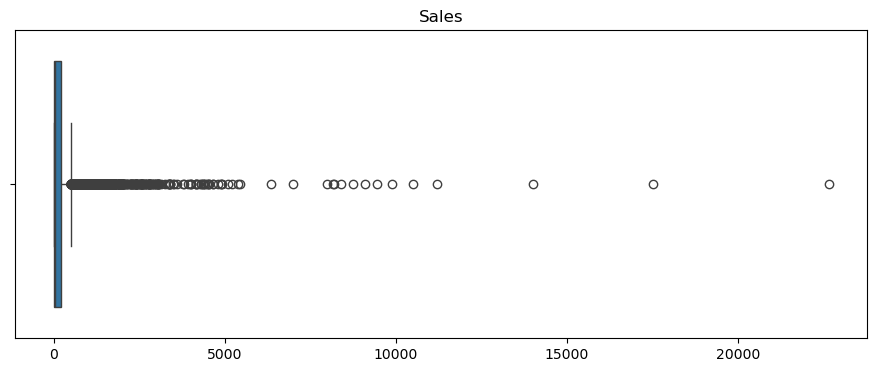

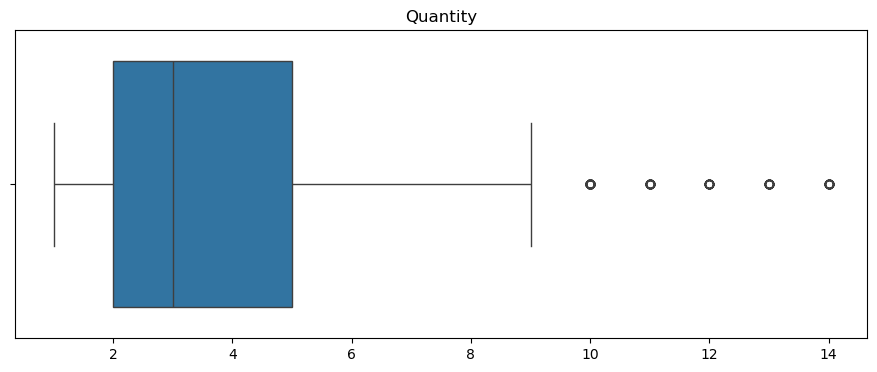

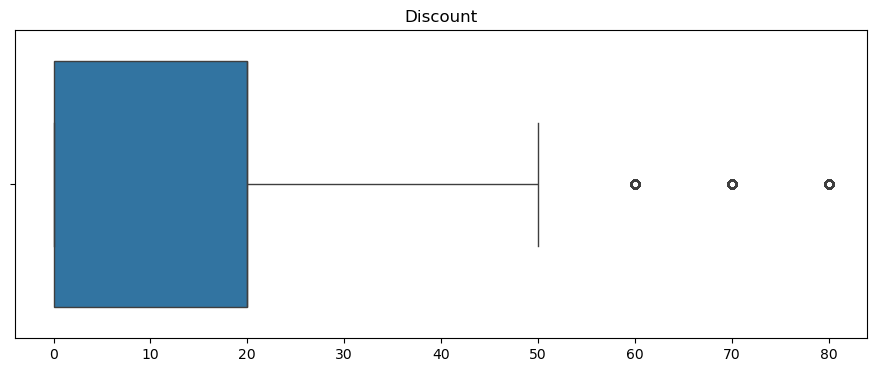

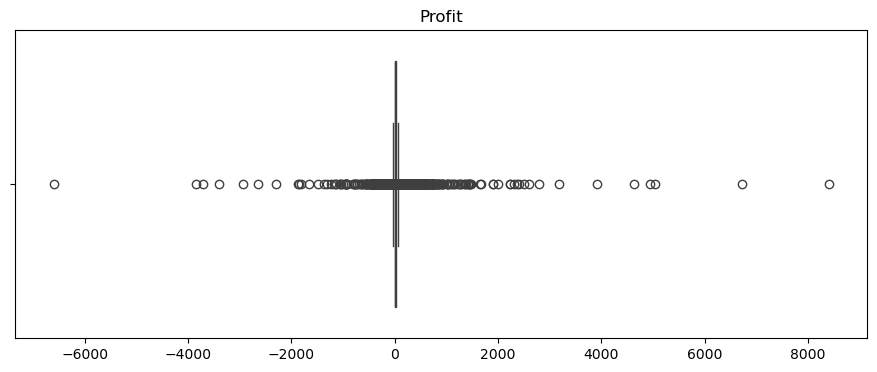

In [28]:
# looping boxplot to seek for outlier
column_to_handle = ["Sales", "Quantity", "Discount", "Profit"]
for index, col in enumerate(column_to_handle):
    plt.figure(figsize=(11,4))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

plt.show()

In [29]:
# identify lower and upper bound of each column's outlier
outlier_dict = {
    "Lower Bound": [],
    "Upper Bound": [],
    "Total Outlier": [],
    "Percentage of All": []
}

# iterate
for col in column_to_handle: # column_to_handle has been previously assigned
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    floor = Q1 - 1.5 * IQR
    ceiling = Q3 + 1.5 * IQR
    
    total_outlier = len(df[(df[col] < floor) | (df[col] > ceiling)])
    outlier_percentage = total_outlier / len(df) * 100

    # append
    outlier_dict["Lower Bound"].append(round(floor, 2))
    outlier_dict["Upper Bound"].append(round(ceiling, 2))
    outlier_dict["Total Outlier"].append(total_outlier)
    outlier_dict["Percentage of All"].append(round(outlier_percentage, 2))

pd.DataFrame(outlier_dict, index=column_to_handle)

,Lower Bound,Upper Bound,Total Outlier,Percentage of All
Sales,-271.71,498.93,1167,11.68
Quantity,-2.50,9.50,170,1.70
Discount,-30.00,50.00,856,8.57
Profit,-39.72,70.82,1881,18.82


Considering the focus of this analysis is to understand the conditions of profit decline, particularly situations where profit becomes negative, outliers will be retained in the dataset. By keeping the outliers, the analysis can provide deeper insights into the factors affecting the conditions of negative profit.

Furthermore, outliers should only be discarded if their causes can be traced, such as errors in recording observations and equipment settings, because sometimes outlier is providing information that other data points cannot<sup>1</sup>.


<br>
<sub>1. Gujarati, D. N. and Porter, D. C. (2009). Basic Econometrics. 5th ed. New York: Mc-Graw-Hill/Irwin.</sub>

## Handling Anomalies

This section is dedicated to examining whether there are anomalies in the dataset columns that will be used, based on the information obtained previously.

### Numerical Columns

The reference for anomalies in the numerical columns is based on the previously known descriptive statistics. Therefore, it can be concluded that:
1. Sales do not have anomalies, as there are no negative values.
2. Quantity does not have anomalies, as there are no negative values.
3. Discount does not have anomalies, as there are no negative values or maximum values exceeding 100 percent.
4. Profit can be considered to not have anomalies, even though there are negative values. This is deemed reasonable due to several natural factors, such as the implementation of discount strategies to attract new customers or enhance the loyalty of existing customers, or high operational costs that prevent the company from covering fixed costs.

### Categorical Columns

The reference for anomalies in the categorical columns is based on the unique data in each column.

In [37]:
df.groupby("Region")["Country"].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
1,APJ,"[Japan, Australia, Philippines, India, Singapore, New Zealand, South Korea, China, Indonesia, Taiwan]"
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, France, Luxembourg, United Kingdom, Spain, South Africa, Portugal, Belgium, Russia, Netherlands, Poland, Czech Republic, Saudi Arabia, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, Austria, Egypt, Denmark, Croatia, Qatar, Slovenia, Iceland]"


There are no anomalies; the countries are correctly aligned with their respective regions.

## Handling Duplicated Data

In [40]:
# remove, if any, whitespaces before handling
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [41]:
df.duplicated().sum()

0

There are no duplicates.

## Saving Clean Data

In [44]:
df.shape

(9994, 13)

There is no difference in the number of rows before and after the data was cleaned; however, there has been a change in the number of columns from 19 to 15, as unecessary columns for the analysis were removed.

In [46]:
df.to_csv("SaaS-Sales_clean.csv", index=False)

# Data Analysis

## Product Performance

We will examine the overall performance of each product to determine whether all products demonstrate good profit or if there are some that are underperforming with very low or even negative profits that harm the company.

In [49]:
df_product_overallProfit = df.groupby("Product")["Profit"].sum().sort_values(ascending=False).reset_index(name="Total Profit")
df_product_overallProfit["Percentage"] = round((df_product_overallProfit["Total Profit"] / df_product_overallProfit["Total Profit"].sum()) * 100, 2)
df_product_overallProfit

,Product,Total Profit,Percentage
0,Alchemy,55617.8249,19.42
1,Site Analytics,44515.7306,15.54
2,Data Smasher,41936.6357,14.64
3,Support,32864.4698,11.48
4,FinanceHub,32136.4203,11.22
5,Marketing Suite - Gold,21278.8264,7.43
6,OneView,18138.0054,6.33
7,SaaS Connector Pack,13059.1436,4.56
8,ContactMatcher,12496.2822,4.36
9,SaaS Connector Pack - Gold,6964.1767,2.43


In [50]:
print(df[df["Profit"] < 0]["Product"].unique())
print(f"Number of products with negative profit: {df[df["Profit"] < 0]["Product"].nunique()}")

['ContactMatcher' 'OneView' 'FinanceHub' 'Marketing Suite'
 'SaaS Connector Pack' 'Marketing Suite - Gold' 'Data Smasher'
 'Site Analytics' 'Big Ol Database' 'Support' 'Storage']
Number of products with negative profit: 11


**Insight**

It is noted that the products contributing the most to the overall profit of the company are Alchemy, Site Analytics, Data Smasher, Support, and FinanceHub, with each product exceeding 10% of the total profit. Also, there is one product that shows a loss for the company, namely Marketing Suite, with a profit of -3,472.55 or -1.21 percent of the total profit from all products sold.

However, it is known that out of the 14 SaaS products sold by the company, 11 products have transactions with negative profit. Given that the purpose of this analysis is to identify factors contributing to the underperformance of products, particularly those with negative profit, the next analysis will focus on these 11 products as a project limitation.

In [52]:
listProduct_negativeProfit = df[df["Profit"] < 0]["Product"].unique()
df_negativeProduct = df[df["Product"].isin(listProduct_negativeProfit)].sort_values(by="Order Date").reset_index(drop=True)
display(df_negativeProduct.head(), df_negativeProduct.tail())

,Order ID,Order Date,Country,Region,Customer,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,APJ-2020-103800,2020-01-04,Japan,APJ,Siemens,Manufacturing,SMB,Support,730VUNTJF5,16.448,2,20.0,5.5512
1,APJ-2020-112326,2020-01-05,Australia,APJ,CVS Health,Retail,Enterprise,Marketing Suite - Gold,54J2FWJY59,272.736,3,20.0,-64.7748
2,APJ-2020-112326,2020-01-05,Australia,APJ,CVS Health,Retail,Enterprise,FinanceHub,XGQWR8K66V,11.784,3,20.0,4.2717
3,APJ-2020-112326,2020-01-05,Australia,APJ,CVS Health,Retail,Enterprise,ContactMatcher,K3HDHHY5YG,3.540,2,80.0,-5.4870
4,AMER-2020-130813,2020-01-07,United States,AMER,ConocoPhillips,Energy,SMB,Support,8O9MZEYB3W,19.440,3,0.0,9.3312


,Order ID,Order Date,Country,Region,Customer,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
8871,AMER-2023-115427,2023-12-31,United States,AMER,Aviva,Finance,Strategic,ContactMatcher,YIM32OGSAB,13.904,2,20.0,4.5188
8872,EMEA-2023-156720,2023-12-31,Russia,EMEA,Tyson Foods,Consumer Products,SMB,Storage,1NXYUPA4CX,3.024,3,20.0,-0.6048
8873,AMER-2023-115427,2023-12-31,United States,AMER,Aviva,Finance,Strategic,ContactMatcher,4JYA40RZV2,20.720,2,20.0,6.4750
8874,APJ-2023-126221,2023-12-31,India,APJ,Merck,Healthcare,Enterprise,OneView,M9TYD0GZDM,209.300,2,0.0,56.5110
8875,EMEA-2023-143259,2023-12-31,United Kingdom,EMEA,Morgan Stanley,Finance,SMB,ContactMatcher,IHFJIL4RNB,52.776,3,20.0,19.7910


## SaaS Product Sales Distribution

We will examine the sales distribution to identify the customers with the highest interest in using the eleven SaaS products.

### Based on Region

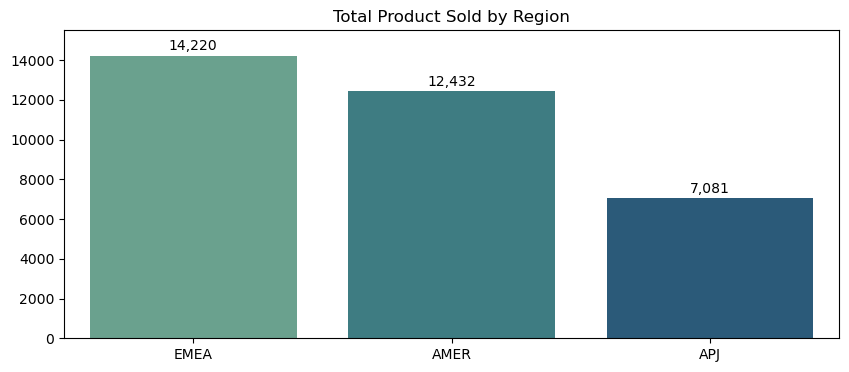

In [55]:
df_region_productSold = df_negativeProduct.groupby("Region")["Quantity"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x="Region", y="Quantity", data=df_region_productSold, hue="Region", palette="crest")
plt.title("Total Product Sold by Region")
plt.xlabel("")
plt.ylabel("")

max_value = df_region_productSold["Quantity"].max()
plt.ylim(0, max_value * 1.09)

for index, value in enumerate(df_region_productSold["Quantity"]):
    plt.text(index, value * 1.01, f"{round(value, 2):,}", va="bottom", ha="center")

plt.show()

**Insight**

The EMEA region has the highest sales volume with 14,220 units, followed by the AMER region with 12,432 units, and APJ in third place with 7,081 units. This data indicates that:
1. The EMEA region has the highest demand for the SaaS product, suggesting potential for the company to focus on product sales in this region.
2. While the AMER and APJ regions can be improved by leveraging strategies from the EMEA region, efforts should be more tailored to local market needs.

### Based on Industry

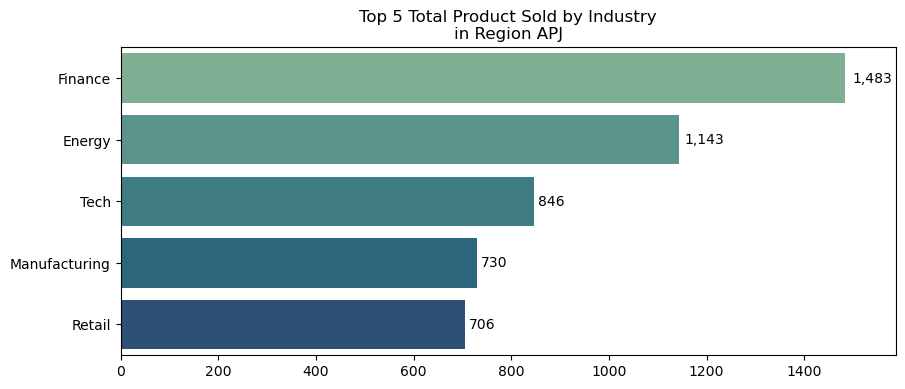

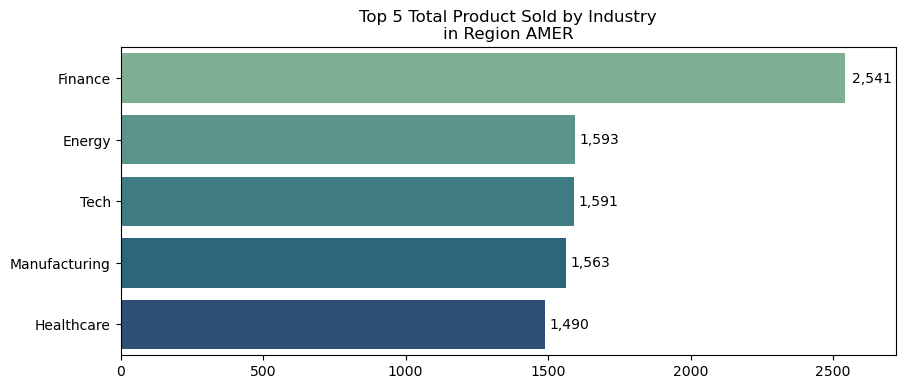

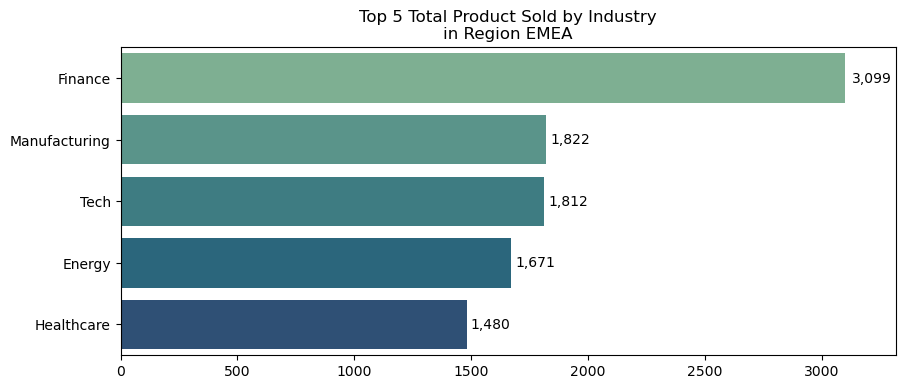

In [58]:
listRegion = [i for i in df_negativeProduct["Region"].unique()]
for region in listRegion:
    df_region = df_negativeProduct[df_negativeProduct["Region"] == region]
    df_industry_byRegion = df_region.groupby("Industry")["Quantity"].sum().sort_values(ascending=False).reset_index()
    
    plt.figure(figsize=(10,4))
    sns.barplot(x="Quantity", y="Industry", data=df_industry_byRegion.head(5), hue="Industry", palette="crest")
    plt.title(f"Top 5 Total Product Sold by Industry\nin Region {region}")
    plt.xlabel("")
    plt.ylabel("")
    
    max_value = df_industry_byRegion["Quantity"].max()
    plt.xlim(0, max_value * 1.07)
    
    for index, value in enumerate(df_industry_byRegion["Quantity"].head(5)):
        plt.text(value * 1.01, index, f"{round(value, 2):,}", va="center", ha="left")
    
    plt.show()

**Insight**

The data shows SaaS product sales across the top five industries in each region.
1. EMEA Region: The finance industry dominates with a total of 3,099 sales, significantly higher than other industries like manufacturing (1,822), tech (1,812), energy (1,671), and healthcare (1,480).
2. APJ Region: The finance industry also ranks highest with a total of 1,483 sales, followed by energy (1,143), tech (846), manufacturing (730), and retail (706).
3. AMER Region: The finance industry leads with a total of 2,541 sales. Additionally, this is followed by sectors with similar sales figures, namely energy (1,593), tech (1,591), manufacturing (1,563), and healthcare (1,490).

The finance industry is highly likely to be the primary marketing target, as it ranks as the most popular industry across all three regions. According to [Andre (2014)](https://financesonline.com/2022-saas-industry-market-report/), plans to increase investment in automation are also the highest in the finance industry.

## Demand Trends for the SaaS Product

In [61]:
df_negativeProduct["Monthly Order"] = df_negativeProduct["Order Date"].dt.to_period("M")

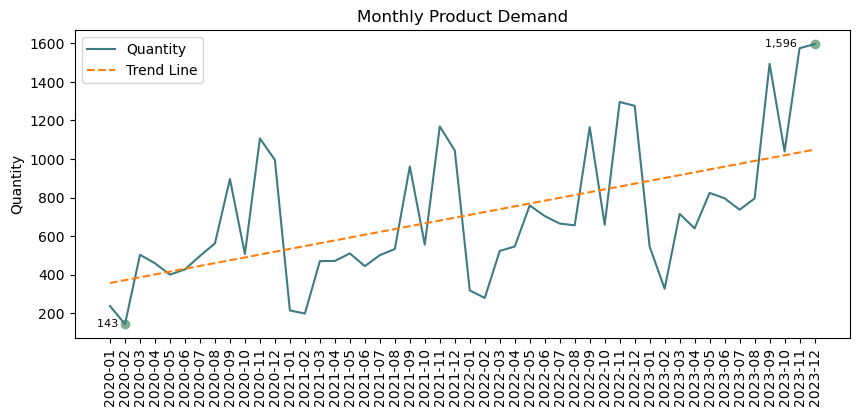

In [62]:
# grouping demand by monthly
monthly_demand = df_negativeProduct.groupby("Monthly Order")["Quantity"].sum().reset_index()
monthly_demand["Monthly Order"] = monthly_demand["Monthly Order"].astype(str)

# performing lineplot
plt.figure(figsize=(10,4))
sns.lineplot(x="Monthly Order", y="Quantity", data=monthly_demand, label="Quantity", color="#3e7c82")

# performing trend lines
x = np.arange(len(monthly_demand))
y = monthly_demand["Quantity"].values
coefficients = np.polyfit(x, y, 1)
trendline = np.polyval(coefficients, x)
plt.plot(monthly_demand["Monthly Order"], trendline, color="#ff7f0e", linestyle="--", label="Trend Line")

# add label to the highest and lowest demand
## finding highest and lowest value
max_demand = monthly_demand["Quantity"].max()
max_month = monthly_demand.loc[monthly_demand["Quantity"].idxmax(), "Monthly Order"]

min_demand = monthly_demand["Quantity"].min()
min_month = monthly_demand.loc[monthly_demand["Quantity"].idxmin(), "Monthly Order"]

## add text to the axes
plt.text(max_month, max_demand, f"{round(max_demand, 2):,}     ", 
         va="center", 
         ha="right",
         fontsize=8
)
plt.text(min_month, min_demand, f"{round(min_demand, 2):,}  ", 
         va="center", 
         ha="right", 
         fontsize=8
)

## pointer
plt.scatter(max_month, max_demand, color="#7eaf92")
plt.scatter(min_month, min_demand, color="#7eaf92")

plt.title("Monthly Product Demand")
plt.legend()
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Quantity")
plt.show()

**Insight**

Based on the monthly demand trends for the SaaS product, several conclusions can be drawn:
1. Product demand appears to fluctuate throughout the observation period; however, the trend line indicates an overall increase.
2. The highest demand occurred in December 2023, with 1,596 units sold.
3. The lowest demand occurred in Februari 2020, with only 143 units sold.
4. The high demand leading up to the end of the year, and the low demand at the beginning of each year, indicate the presence of seasonal factors or specific events that drive these fluctuations.

### Based on Region

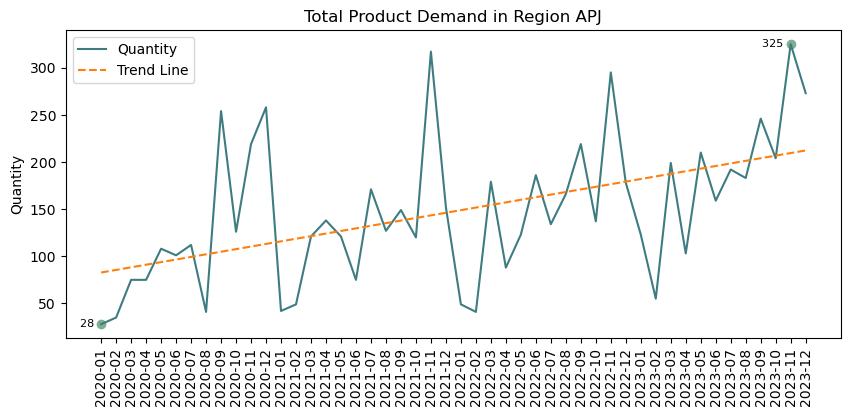

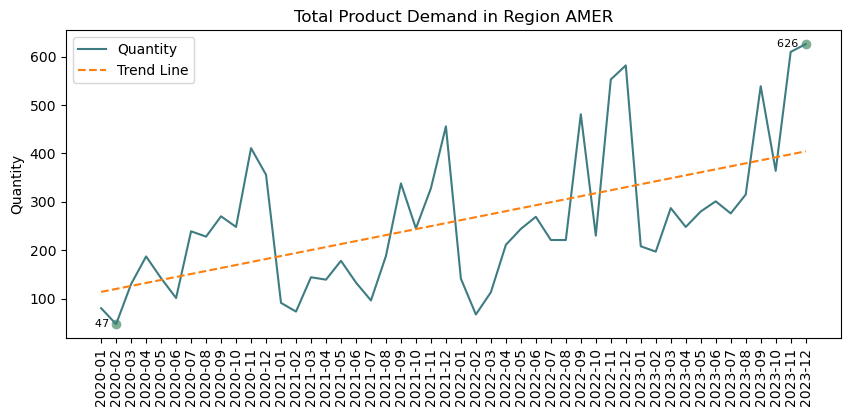

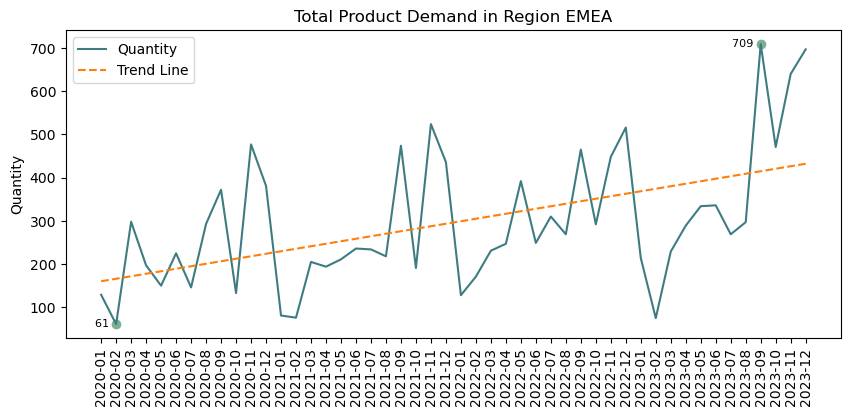

In [65]:
listRegion = [i for i in df_negativeProduct["Region"].unique()]
for region in listRegion:
    df_region = df_negativeProduct[df_negativeProduct["Region"] == region]
    # grouping demand by monthly
    monthly_demand = df_region.groupby("Monthly Order")["Quantity"].sum().reset_index()
    monthly_demand["Monthly Order"] = monthly_demand["Monthly Order"].astype(str)
    
    # performing lineplot
    plt.figure(figsize=(10,4))
    sns.lineplot(x="Monthly Order", y="Quantity", data=monthly_demand, label="Quantity", color="#3e7c82")
    
    # performing trend lines
    x = np.arange(len(monthly_demand))
    y = monthly_demand["Quantity"].values
    coefficients = np.polyfit(x, y, 1)
    trendline = np.polyval(coefficients, x)
    plt.plot(monthly_demand["Monthly Order"], trendline, color="#ff7f0e", linestyle="--", label="Trend Line")
    
    # add label to the highest and lowest demand
    ## finding highest and lowest value
    max_demand = monthly_demand["Quantity"].max()
    max_month = monthly_demand.loc[monthly_demand["Quantity"].idxmax(), "Monthly Order"]
    
    min_demand = monthly_demand["Quantity"].min()
    min_month = monthly_demand.loc[monthly_demand["Quantity"].idxmin(), "Monthly Order"]
    
    ## add text to the axes
    plt.text(max_month, max_demand, f"{round(max_demand, 2)}  ", 
             va="center", 
             ha="right", 
             fontsize=8
    )
    plt.text(min_month, min_demand, f"{round(min_demand, 2)}  ", 
             va="center", 
             ha="right", 
             fontsize=8
    )

    ## pointer
    plt.scatter(max_month, max_demand, color="#7eaf92")
    plt.scatter(min_month, min_demand, color="#7eaf92")

    plt.title(f"Total Product Demand in Region {region}")
    plt.legend()
    plt.xlabel("")
    plt.xticks(rotation=90)
    plt.ylabel("Quantity")
    plt.show()

**Insight**

Based on the monthly demand trends of each region, it can be observed that:
1. In the EMEA region, demand increases significantly leading up to the end of the year, especially in November and December, indicating the presence of seasonal factors influencing demand.
2. There is a more consistent demand pattern in AMER compared to EMEA, but significant spikes still occur in the final months of the year, suggesting potential seasonality.
3. Demand in the APJ region is not as high as in the other two regions, but there are indications of increased demand approaching the end of the year, similar to trends in other regions.
4. Considering the seasonal trends observed across all regions, the company should consider designing targeted marketing campaigns leading up to the end of the year.

## Monthly Sales Trend of the SaaS Product

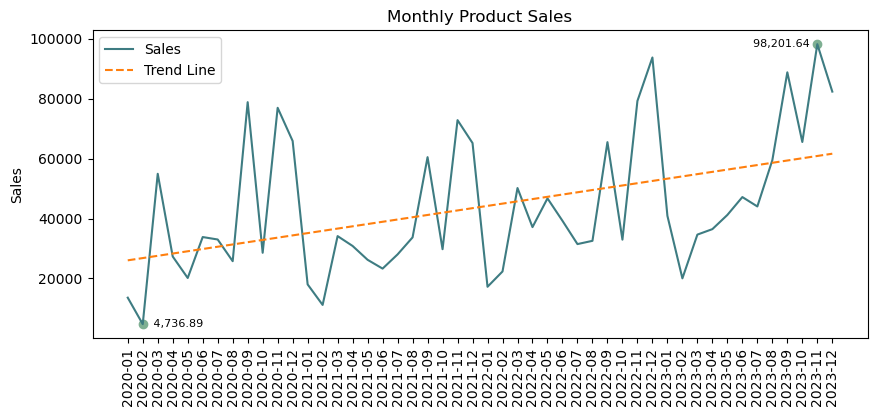

In [68]:
# grouping sales by monthly
monthly_sales = df_negativeProduct.groupby("Monthly Order")["Sales"].sum().reset_index()
monthly_sales["Monthly Order"] = monthly_sales["Monthly Order"].astype(str)

# performing lineplot
plt.figure(figsize=(10,4))
sns.lineplot(x="Monthly Order", y="Sales", data=monthly_sales, label="Sales", color="#3e7c82")

# performing trend lines
x = np.arange(len(monthly_sales))
y = monthly_sales["Sales"].values
coefficients = np.polyfit(x, y, 1)
trendline = np.polyval(coefficients, x)
plt.plot(monthly_sales["Monthly Order"], trendline, color="#ff7f0e", linestyle="--", label="Trend Line")

# add label to the highest and lowest sales
## finding highest and lowest value
max_sales = monthly_sales["Sales"].max()
max_month = monthly_sales.loc[monthly_sales["Sales"].idxmax(), "Monthly Order"]

min_sales = monthly_sales["Sales"].min()
min_month = monthly_sales.loc[monthly_sales["Sales"].idxmin(), "Monthly Order"]

## add text to the axes
plt.text(max_month, max_sales, f"{round(max_sales, 2):,}  ", 
         va="center", 
         ha="right", 
         fontsize=8
)
plt.text(min_month, min_sales, f"   {round(min_sales, 2):,}", 
         va="center", 
         ha="left", 
         fontsize=8
)

## pointer
plt.scatter(max_month, max_sales, color="#7eaf92")
plt.scatter(min_month, min_sales, color="#7eaf92")

plt.title("Monthly Product Sales")
plt.legend()
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Sales")
plt.show()

**Insight**

Based on the monthly sales trend data for the SaaS product, several insights can be concluded:
1. Although monthly data fluctuates, a trendline reveals an overall increase in sales.
2. The highest sales peak occurred in November 2023, with total sales reaching 98,201.64. This significant rise could indicate a successful promotional strategy that led to a sharp increase in demand.
3. The lowest decline was observed in February 2020, with total sales at only 4,736.89. This decrease may be attributed to seasonal factors or specific market conditions affecting customer interest, for example the pandemic [(Andre, 2024)](https://financesonline.com/2022-saas-industry-market-report/).
4. Each year, November and December tend to have the highest sales figures, indicating a seasonal pattern or events that boost sales at the end of the year.
5. The first quarter of each year generally experiences lower sales, with February and January often marking the lowest sales points of the year.

## Monthly Profit Trend of the SaaS Product

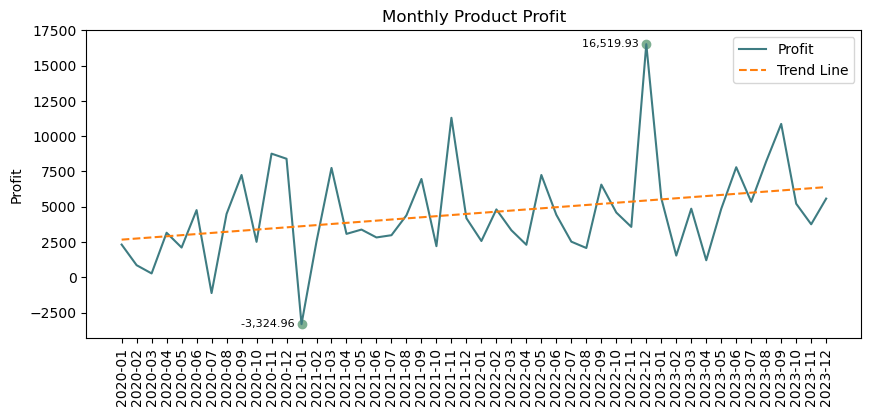

In [71]:
# grouping profit by monthly
monthly_profit = df_negativeProduct.groupby("Monthly Order")["Profit"].sum().reset_index()
monthly_profit["Monthly Order"] = monthly_profit["Monthly Order"].astype(str)

# performing lineplot
plt.figure(figsize=(10,4))
sns.lineplot(x="Monthly Order", y="Profit", data=monthly_profit, label="Profit", color="#3e7c82")

# performing trend lines
x = np.arange(len(monthly_profit))
y = monthly_profit["Profit"].values
coefficients = np.polyfit(x, y, 1)
trendline = np.polyval(coefficients, x)
plt.plot(monthly_profit["Monthly Order"], trendline, color="#ff7f0e", linestyle="--", label="Trend Line")

# add label to the highest and lowest profit
## finding highest and lowest profit
max_profit = monthly_profit["Profit"].max()
max_month = monthly_profit.loc[monthly_profit["Profit"].idxmax(), "Monthly Order"]

min_profit = monthly_profit["Profit"].min()
min_month = monthly_profit.loc[monthly_profit["Profit"].idxmin(), "Monthly Order"]

## add text to the axes
plt.text(max_month, max_profit, f"{round(max_profit, 2):,}  ", 
         va="center", 
         ha="right", 
         fontsize=8
)
plt.text(min_month, min_profit, f"{round(min_profit, 2):,}  ", 
         va="center", 
         ha="right", 
         fontsize=8
)

## pointer
plt.scatter(max_month, max_profit, color="#7eaf92")
plt.scatter(min_month, min_profit, color="#7eaf92")

plt.title("Monthly Product Profit")
plt.legend()
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Profit")
plt.show()

**Insight**

Based on the analysis of the monthly profit trend for the SaaS product, several conclusions can be drawn:
1. Monthly profit values fluctuate significantly, occasionally experiencing periods of negative profit. This reflects instability in the product's profitability month-to-month, which may be influenced by large discounts affecting pricing and demand.
2. Each year tends to see a significant profit increase in November and December, indicating a strong seasonal influence at the end of the year.
3. The first quarter of each year usually shows lower profits, suggesting an opportunity to focus on profit-boosting strategies at the start of the year.
4. The highest peak occurred in December 2022, with a profit of 16,519. In contrast, the lowest peak occurred in January 2021, with a profit of -3,324.96, likely due to high costs or excessive discounts.

### Based on Region

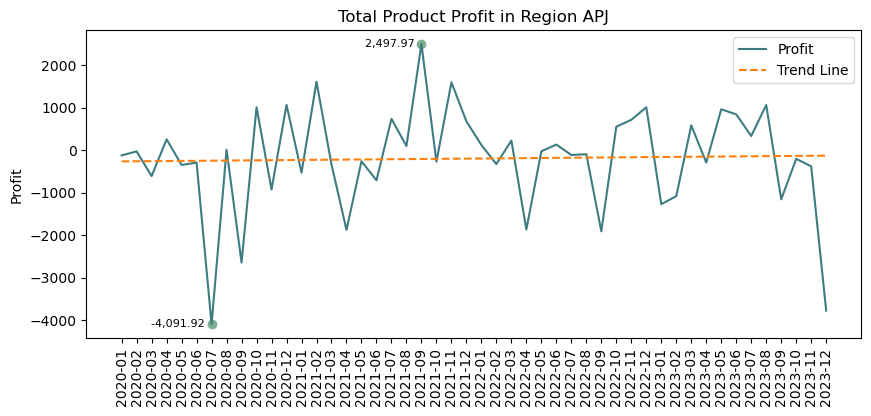

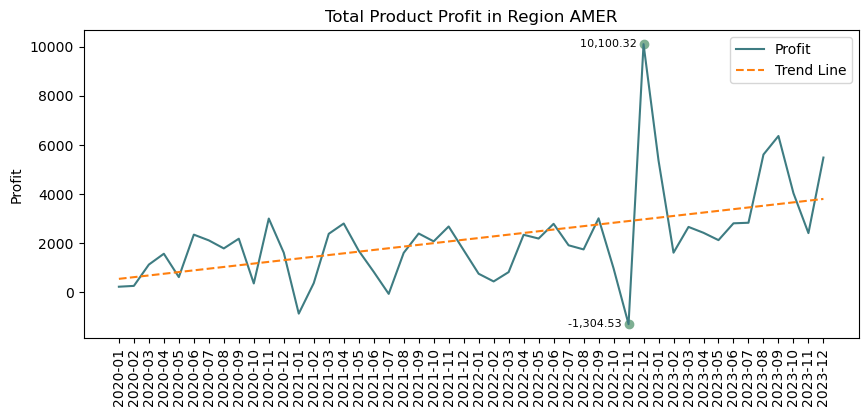

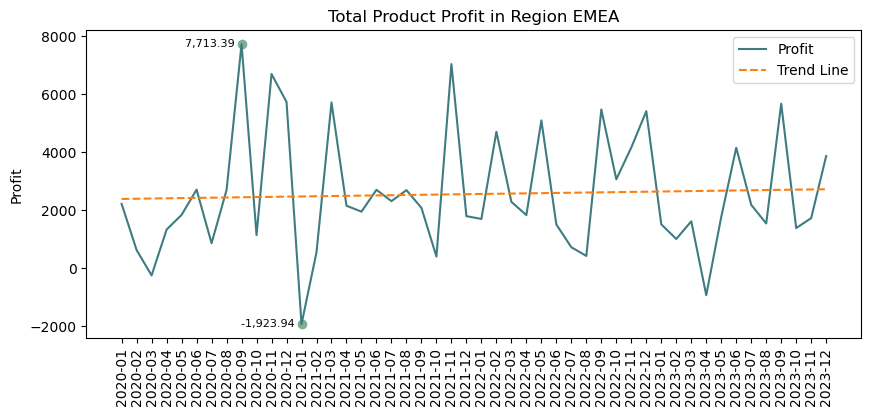

In [74]:
listRegion = [i for i in df_negativeProduct["Region"].unique()]
for region in listRegion:
    df_region = df_negativeProduct[df_negativeProduct["Region"] == region]
    # grouping demand by monthly
    monthly_profit = df_region.groupby("Monthly Order")["Profit"].sum().reset_index()
    monthly_profit["Monthly Order"] = monthly_profit["Monthly Order"].astype(str)
    
    # performing lineplot
    plt.figure(figsize=(10,4))
    sns.lineplot(x="Monthly Order", y="Profit", data=monthly_profit, label="Profit", color="#3e7c82")
    
    # performing trend lines
    x = np.arange(len(monthly_profit))
    y = monthly_profit["Profit"].values
    coefficients = np.polyfit(x, y, 1)
    trendline = np.polyval(coefficients, x)
    plt.plot(monthly_profit["Monthly Order"], trendline, color="#ff7f0e", linestyle="--", label="Trend Line")
    
    # add label to the highest and lowest demand
    ## finding highest and lowest value
    max_profit = monthly_profit["Profit"].max()
    max_month = monthly_profit.loc[monthly_profit["Profit"].idxmax(), "Monthly Order"]
    
    min_profit = monthly_profit["Profit"].min()
    min_month = monthly_profit.loc[monthly_profit["Profit"].idxmin(), "Monthly Order"]
    
    ## add text to the axes
    plt.text(max_month, max_profit, f"{round(max_profit, 2):,}  ", 
             va="center", 
             ha="right", 
             fontsize=8
    )
    plt.text(min_month, min_profit, f"{round(min_profit, 2):,}  ", 
             va="center", 
             ha="right", 
             fontsize=8
    )

    ## pointer
    plt.scatter(max_month, max_profit, color="#7eaf92")
    plt.scatter(min_month, min_profit, color="#7eaf92")

    plt.title(f"Total Product Profit in Region {region}")
    plt.legend()
    plt.xlabel("")
    plt.xticks(rotation=90)
    plt.ylabel("Profit")
    plt.show()

## Analysis of Profit Differences for the SaaS Product

### Based on Region

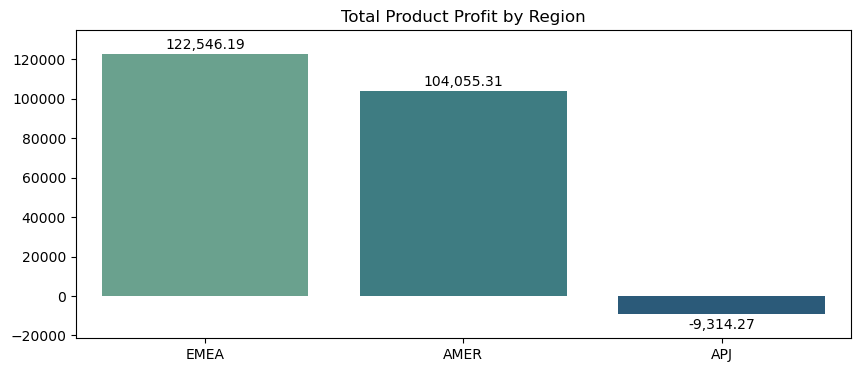

In [77]:
df_region_profit = df_negativeProduct.groupby("Region")["Profit"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x="Region", y="Profit", data=df_region_profit, hue="Region", palette="crest")
plt.title("Total Product Profit by Region")
plt.xlabel("")
plt.ylabel("")

max_value = df_region_profit["Profit"].max()
min_value = df_region_profit["Profit"].min()
plt.ylim(min_value * 2.3, max_value * 1.1)

for index, value in enumerate(df_region_profit["Profit"]):
    if value >= 0:
        plt.text(index, value * 1.01, f"{round(value, 2):,}", va="bottom", ha="center")
    else:
        plt.text(index, value * 1.2, f"{round(value, 2):,}", va="top", ha="center")

plt.show()

**Insight**

The EMEA and AMER regions recorded a positive total profit of 122,546.19 and 104,055.31, respectively. Meanwhile, the APJ regions experienced significant negative profits of -9,314.27, making it the only region with a negative overall profit. This major loss could indicate that the SaaS product is not sufficiently popular or that there are very high operational costs.

### Is the Region Affecting Profit?

**Normality Test**

Since there are more than 2 groups, the Anderson-Darling Test is used to determine whether the data distribution is normal or not.

In [81]:
listRegion = [i for i in df_negativeProduct["Region"].unique()]
for region in listRegion:
    profit_data = df_negativeProduct[df_negativeProduct["Region"] == region]["Profit"]

    # perfom the Anderson-Darling
    result = anderson(profit_data, dist="norm")
    if result.statistic < result.critical_values[2]: # digunakan alpha 0.05
        print(f"Data from the {region} region is normally distributed.")
    else:
        print(f"Data from the {region} region is not normally distributed.")

Data from the APJ region is not normally distributed.
Data from the AMER region is not normally distributed.
Data from the EMEA region is not normally distributed.


**Hypothesis Testing**

Since the data is not normally distributed, the Kruskal-Wallis Test is used, with the hypotheses as follows:  
H0: There is no difference in profit between the EMEA, AMER, and APJ regions.  
H1: There is a difference in profit between the EMEA, AMER, and APJ regions.

In [83]:
profit_EMEA = df_negativeProduct[df_negativeProduct["Region"] == "EMEA"]["Profit"]
profit_AMER = df_negativeProduct[df_negativeProduct["Region"] == "AMER"]["Profit"]
profit_APJ = df_negativeProduct[df_negativeProduct["Region"] == "APJ"]["Profit"]

stat, p_value = kruskal(profit_EMEA, profit_AMER, profit_APJ)
alpha = 0.05

if p_value <= alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


**Insight**

The results of the Kruskal-Wallis test indicate that there is sufficient evidence to reject the null hypothesis, concluding that there is a difference in profit between the EMEA, AMER, and APJ regions. Because there is a significant difference, it suggests that regional factors influence profit.

### Based on Industry

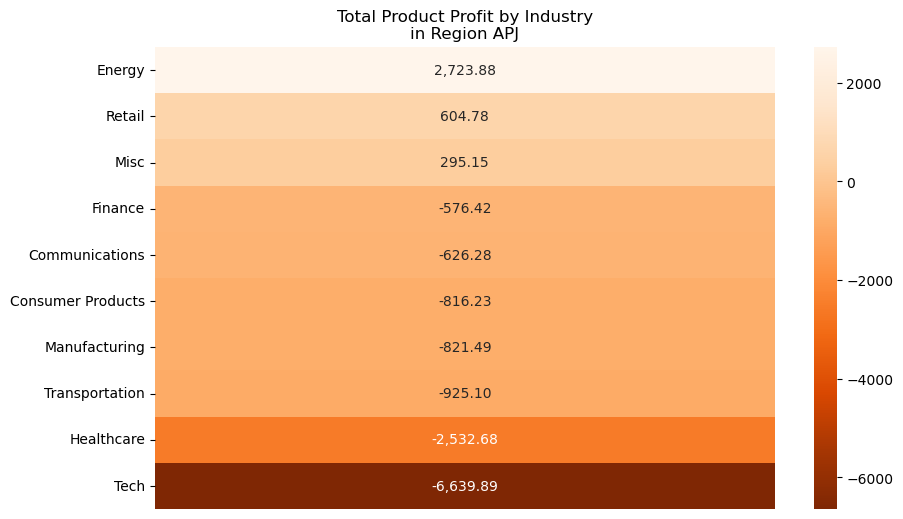

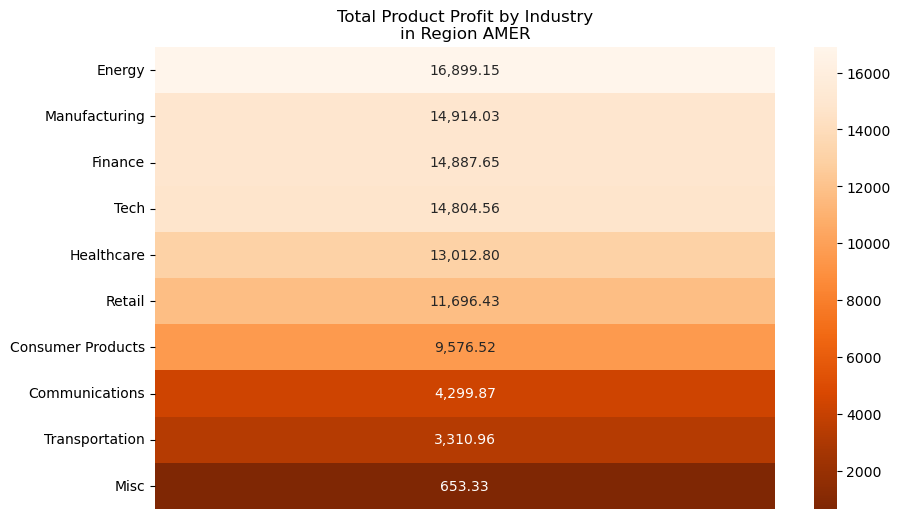

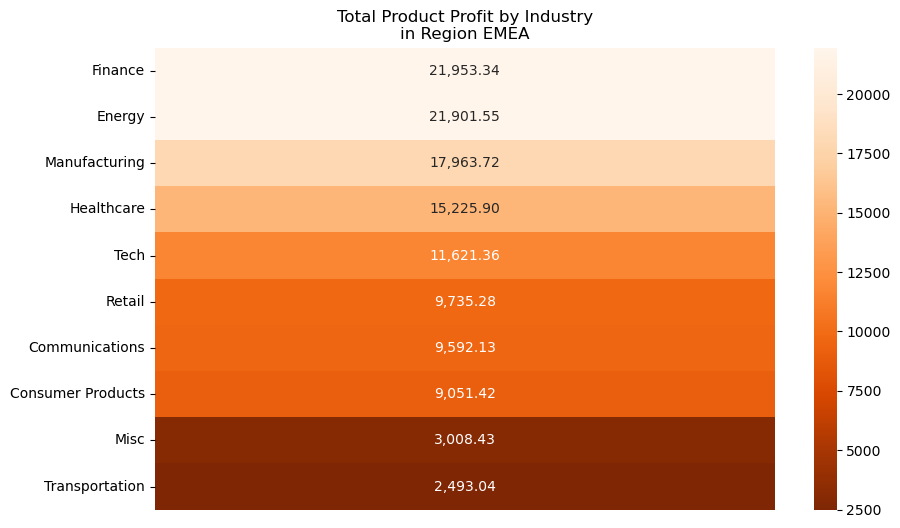

In [86]:
listRegion = [i for i in df_negativeProduct["Region"].unique()]
for region in listRegion:
    df_region = df_negativeProduct[df_negativeProduct["Region"] == region]
    df_industry_byRegion = df_region.groupby("Industry")["Profit"].sum().sort_values(ascending=False).reset_index()
    df_industry_byRegion.set_index("Industry", inplace=True)
    
    plt.figure(figsize=(10,6))
    fmt="{:,.2f}"
    annot = df_industry_byRegion.map(lambda x: fmt.format(x))
    sns.heatmap(df_industry_byRegion, annot=annot, xticklabels=False, fmt="", cmap="Oranges_r")
    
    plt.title(f"Total Product Profit by Industry\nin Region {region}")
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

**Insight**

Based on the total profit data of the SaaS product for each industry in each region, several patterns can be identified:
1. EMEA shows strong profits across most industries, with the Finance and Energy sectors as major contributors.
2. AMER also performs well, particularly in the Energy and Manufacturing sectors, but not as strongly as EMEA in some industries.
3. APJ is very different from the other two regions, experiencing losses in most industries. The Tech sector in APJ faces the largest losses, indicating serious challenges in the technology market in this region.
4. Focusing on profitable sectors like Finance, Energy, and Manufacturing in EMEA and AMER can help maximize profits.
5. There is a need for in-depth analysis of the losses in APJ, particularly in unprofitable sectors like Tech and Healthcare.

### Is Industry Affecting Profit?

**Normality Test**

Since there are more than 2 groups, the Anderson-Darling Test is used to determine whether the data distribution is normal or not.

In [90]:
listIndustry = [i for i in df_negativeProduct["Industry"].unique()]
all_normal = True

for industry in listIndustry:
    industry_profit = df_negativeProduct[df_negativeProduct["Industry"] == industry]["Profit"]

    result = anderson(industry_profit, dist="norm")
    if result.statistic > result.critical_values[2]:
        all_normal = False

if all_normal:
    print("All industries' data are normally distributed.")
else:
    print("Some industries' data are not normally distributed.")

Some industries' data are not normally distributed.


**Hypothesis Testing**

Since the data is not normally distributed, the Kruskal-Wallis Test is used, with the hypotheses as follows:  
H0: There is no difference in profit among the 10 industries.  
H1: There is a difference in profit among the 10 industries.

In [92]:
industry_profit_variables = []

for industry in listIndustry:
    industry_profit = df_negativeProduct[df_negativeProduct["Industry"] == industry]["Profit"]
    industry_profit_variables.append(industry_profit)

stat, p_value = kruskal(*industry_profit_variables)
alpha = 0.05

if p_value <= alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


**Insight**

The results of the Kruskal-Wallis test indicate that there is sufficient evidence to reject the null hypothesis, which can be concluded that there is a difference in profitability among the 10 industries. In other words, different industries have a significant impact on the profit levels generated, with some industries potentially yielding higher or lower profits compared to others.

## Trends in Discount Application for SaaS Products

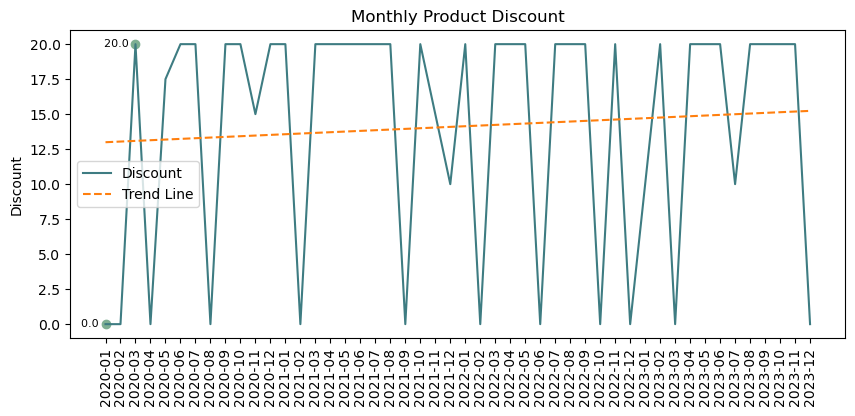

In [95]:
# grouping discount by monthly
monthly_discount = df_negativeProduct.groupby("Monthly Order")["Discount"].median().reset_index()
monthly_discount["Monthly Order"] = monthly_discount["Monthly Order"].astype(str)

# performing lineplot
plt.figure(figsize=(10,4))
sns.lineplot(x="Monthly Order", y="Discount", data=monthly_discount, label="Discount", color="#3e7c82")

# performing trend lines
x = np.arange(len(monthly_discount))
y = monthly_discount["Discount"].values
coefficients = np.polyfit(x, y, 1)
trendline = np.polyval(coefficients, x)
plt.plot(monthly_discount["Monthly Order"], trendline, color="#ff7f0e", linestyle="--", label="Trend Line")

# add label to the highest and lowest discount
## finding highest and lowest value
max_discount = monthly_discount["Discount"].max()
max_month = monthly_discount.loc[monthly_discount["Discount"].idxmax(), "Monthly Order"]

min_discount = monthly_discount["Discount"].min()
min_month = monthly_discount.loc[monthly_discount["Discount"].idxmin(), "Monthly Order"]

## add text to the axes
plt.text(max_month, max_discount, f"{round(max_discount, 2)}  ", 
         va="center", 
         ha="right", 
         fontsize=8,
)
plt.text(min_month, min_discount, f"{round(min_discount, 2)}  ", 
         va="center", 
         ha="right", 
         fontsize=8,
)

## pointer
plt.scatter(max_month, max_discount, color="#7eaf92")
plt.scatter(min_month, min_discount, color="#7eaf92")

plt.title("Monthly Product Discount")
plt.legend()
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Discount")
plt.show()

### Distribution of Discounts on Product Purchase Quantity

In [97]:
df_negativeProduct.groupby("Quantity")["Discount"].median().reset_index()

,Quantity,Discount
0,1,15.0
1,2,20.0
2,3,20.0
3,4,20.0
4,5,15.0
5,6,20.0
6,7,20.0
7,8,20.0
8,9,10.0
9,10,20.0


**Insight**

Based on the monthly discount trend data for the SaaS product, several interpretations can be concluded:
1. The company frequently applies a 20 percent discount throughout most months, although there are variations in certain months. This indicates that the discount policy for the SaaS product is quite consistent, with fluctuations adjusted to respond to seasonal trends or changes in demand.
2. Discounts reach their lowest point (0 percent) in some months, indicating that not all months offer discount incentives. This likely indicates a business approach aimed at maximizing profit margins.
3. The provision of discounts varies regardless of the quantity of products purchased by customers. This shows that the application of discounts may not be effective.

### Is Discount Having an Impact on Profit?

**Normality Test**

In [101]:
stat, p_value = ks_2samp(df_negativeProduct["Profit"], df_negativeProduct["Discount"])
alpha = 0.05

if p_value < alpha:
    print("Data is not normally distributed.")
else:
    print("Data is normally distribued.")

Data is not normally distributed.


**Hypothesis Testing**

Since the data is not normally distributed, the Spearman's Correlation method is used with the following hypotheses:  
H0: There is no relationship between Discount and Profit.  
H1: There is a relationship between Discount and Profit.

In [103]:
r_value, p_value = spearmanr(df_negativeProduct["Profit"], df_negativeProduct["Discount"])
alpha = 0.05

print(f"rho: {r_value}")
print(f"P-value: {p_value}")

if p_value <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

rho: -0.5787918128503766
P-value: 0.0
Reject the null hypothesis.


**Insight**

The results of the hypothesis test indicate that the null hypothesis is rejected, meaning there is a strong negative relationship between Discount and Profit. Subsequently, a regression analysis was conducted to further examine the impact of Discount on Profit.

In [105]:
y = df_negativeProduct["Profit"]
x = df_negativeProduct["Discount"]
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     679.2
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          2.45e-144
Time:                        06:16:22   Log-Likelihood:                -59382.
No. Observations:                8876   AIC:                         1.188e+05
Df Residuals:                    8874   BIC:                         1.188e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.1157      2.612     25.312      0.0

In [106]:
result = linregress(df_negativeProduct["Discount"], df_negativeProduct["Profit"])

df_residual = df_negativeProduct.copy()

# perdicted value
df_residual["Predicted"] = result.intercept + result.slope * df_residual["Discount"]
# residual value
df_residual["Residual"] = df_residual["Profit"] - df_residual["Predicted"]

mae = mean_absolute_error(df_residual["Profit"], df_residual["Predicted"])
print(f"MAE: {mae}")

MAE: 67.64101054688207


**Insight**

Y = 66.116 - 2.514X1  
where:  
Y: Profit  
X1: Discount

Based on the regression results, it can be concluded that:
1. R-Squared Test: Indicates that 7.1 percent of the variation in the dependent variable, namely Profit, can be explained by the variation in the independent variable, namely Discount.
2. F-Test: Indicates that the Discount variable significantly affects the Profit variable.
3. T-Test:
   - The intercept has a significant impact. The estimated value of Profit is 66.116, ceteris paribus.
   - The Discount variable has a partial effect on the Profit variable at a significance level of alpha 0.01.

Result Interpretation:
- The Discount variable shows a significant negative effect, where every 1 percent increase in Discount leads to a decrease in Profit of 2.514 units.

# Conclusion

Based on the analysis conducted, the following conclusions can be drawn:
1. There are 11 SaaS products that had negative profit transactions during the analysis period from January 2020 to December 2023, with Marketing Suite being the only product that experienced a negative profit of -3,472.56, or -1.21 percent of the total profit.
2. The latter months of each year (such as November-December) tend to have higher order volume and sales, which may indicate an increase in year-end demand or seasonal purchasing behavior.
3. Monthly profit fluctuates with several peaks and declines, but the overall trend shows growth, despite two negative profits in July 2020 and January 2021.
4. By region, APJ experienced a negative profit of -9,314.27, while the other regions had positive profits.
5. Based on industry by each region, the sectors contributo ting the highest negative profits are only in the APJ region, with the highest being Tech and Healthcare.
6. Regional and industry differences play a significant role in the variation of profit for SaaS products.
7. A high discount (20 percent) is frequently offered, especially during months with high sales. However, profits are not always high despite the substantial discounts. In some months with large discounts, such as January 2021 and July 2020, profits showed negative figures. This may indicate that large discounts can significantly reduce profitability.
8. The implementation of discounts has a significant negative effect on profit; however, their application is not adjusted based on the quantity of products purchased.

# Recommendation

Based on the analysis conclusions, here are several recommendations that can be made to increase the profit of the Marketing Suite product and mitigate negative profit:
1. Product Promotion Based on Periodic Demand:
   - For all regions, high year-end demand can be leveraged through product service extension options with incentive bonuses, such as free access to premium services for two weeks. This is expected to attract customer loyalty or boost enthusiasm for upgrading their product subscription package.
   - Specifically for the APJ region, free training can be conducted to demonstrate the effectiveness and usefulness of the SaaS product for customer business purposes in the low demand period, which is the first to second quarter of the year. The scope can be focused on sectors that might have high demand potential but negatively contribute to profit, such as Finance, Tech, and Manufacturing.
2. Discount Segmentation Based on Purchase Quantity:
   - Use a progressive discount strategy by offering higher discounts for more expensive products to more effectively maintain profitability, and to [encourage higher purchase levels](https://www.mageworx.com/blog/tiered-discounts-model-how-does-it-work).
   - Adopting the approach from the study by Gong et al. (2015)<sup>1</sup>, customers can be given a 5 percent discount for low tier purchases, a 10 percent discount for mid tier, and a 15 percent discount for high tier purchases. The classification is based on the actual product price range of each product.
   - Meanwhile, for low quantity purchases (1 to 4), discounts can be omitted or only non-monetary incentives provided, such as a premium trial feature of sales and marketing automation for two weeks. Note that the portion of the premium subscription price provided as a trial proportion must not exceed the discount amount offered if the customer purchases more than 5 units.
3. Optimize Discount Strategies by Region:
   - Reduce discounts in the APJ regions, especially in Healthcare and Transportation sectors, which having the highest negative profits, to make them more targeted and reduce reliance on discounts as the primary tool for increasing demand.
  

<br>
<sub>1. Gong, J., Smith, M. D., and Telang, R. (2015). Substitution or Promotion? The Impact of Price Discounts on Cross-Channel Sales of Digital Movies. Journal of Retailing, 91(2), 343-357.
</sub>

## Application of the Recommended Discount

In [113]:
# calculate actual price of product per unit
df_negativeProduct["Actual Price"] = df_negativeProduct["Sales"] / df_negativeProduct["Quantity"]

# calculate net sales
df_negativeProduct["Net Sales"] = df_negativeProduct["Sales"] * (1 - (df_negativeProduct["Discount"] / 100))

# calculate cost of product per unit
df_negativeProduct["Cost"] = (df_negativeProduct["Net Sales"] - df_negativeProduct["Profit"]) / df_negativeProduct["Quantity"]

In [114]:
# seeking price range for each product in each segment
product_minmax = df_negativeProduct.groupby(["Product", "Segment"])["Actual Price"].agg(["min", "max"]).sort_values(by=["Product", "max"], ascending=[True, False]).reset_index()
product_minmax.columns = ["Product", "Segment", "Min Price", "Max Price"]
product_minmax.head(5)

,Product,Segment,Min Price,Max Price
0,Big Ol Database,Enterprise,11.560,3773.080
1,Big Ol Database,Strategic,13.110,2399.992
2,Big Ol Database,SMB,4.335,1749.990
3,ContactMatcher,SMB,0.360,1889.990
4,ContactMatcher,Enterprise,0.396,1511.992


In [115]:
# define tier based on product price
def assign_price_tier(row):
    product = row["Product"]
    segment = row["Segment"]
    actual_price = row["Actual Price"]

    relevant_row = product_minmax[(product_minmax["Product"] == product) & (product_minmax["Segment"] == segment)].iloc[0]
    min_price = relevant_row["Min Price"]
    max_price = relevant_row["Max Price"]
    range_price = max_price - min_price

    if actual_price <= min_price + (range_price / 3):
        return "Low"
    elif actual_price <= min_price + (2 * range_price / 3):
        return "Mid"
    else:
        return "High"

# assign price tier
df_negativeProduct["Price Tier"] = df_negativeProduct.apply(assign_price_tier, axis=1)

# assign discount based on Actual Price Tier
df_negativeProduct["Revised Discount"] = df_negativeProduct["Price Tier"].apply(lambda x: 5 if x == "Low" else 10 if x == "Mid" else 15 if x == "High" else 0)

In [116]:
# applying revised discount
df_negativeProduct["Expected Profit"] = df_negativeProduct.apply(
    lambda row:
    (row["Actual Price"] * row["Quantity"] * (1 - (row["Revised Discount"] / 100)) - 
     (row["Cost"] * row["Quantity"]))
    if not (row["Region"] == "APJ" and row["Industry"] in ["Healthcare", "Transportation"])
    else # if the region is APJ and industry is Healthcare or Transportation
    (row["Actual Price"] * row["Quantity"] - 
     (row["Cost"] * row["Quantity"])),
    axis=1
)

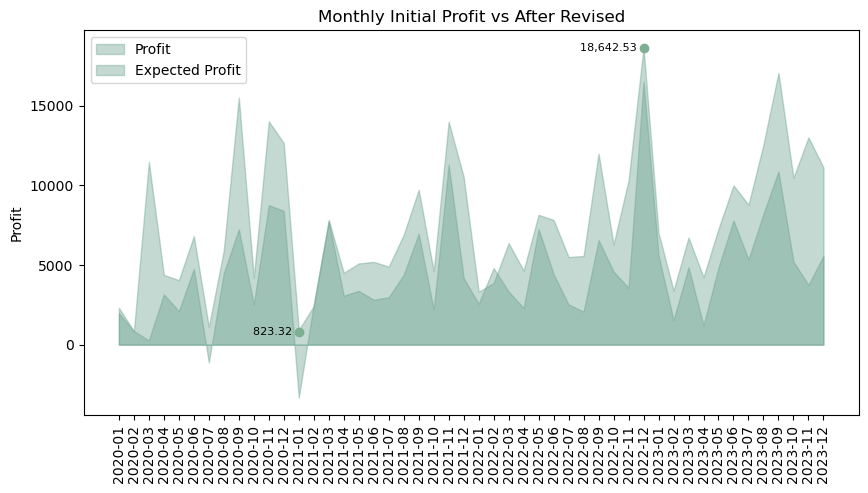

In [117]:
# profit differences
df_monthly_profit = df_negativeProduct.groupby("Monthly Order").sum(numeric_only=True)[["Profit", "Expected Profit"]].reset_index()
df_monthly_profit["Monthly Order"] = df_monthly_profit["Monthly Order"].astype(str)

# performing area chart
plt.figure(figsize=(10,5))
listProfit = ["Profit", "Expected Profit"]
for profit in listProfit:
    plt.fill_between(df_monthly_profit["Monthly Order"], df_monthly_profit[profit], color="#6aa18e", alpha=0.4, label=profit)
    plt.plot(df_monthly_profit["Monthly Order"], df_monthly_profit[profit], color="#6aa18e", alpha=0)

# add label to the highest and lowest profit
## finding highest and lowest profit
max_profit = df_monthly_profit["Expected Profit"].max()
max_month = df_monthly_profit.loc[df_monthly_profit["Profit"].idxmax(), "Monthly Order"]

min_profit = df_monthly_profit["Expected Profit"].min()
min_month = df_monthly_profit.loc[df_monthly_profit["Profit"].idxmin(), "Monthly Order"]

## add text to the axes
plt.text(max_month, max_profit, f"{round(max_profit, 2):,}  ", 
         va="center", 
         ha="right", 
         fontsize=8
)
plt.text(min_month, min_profit, f"{round(min_profit, 2)}  ", 
         va="center", 
         ha="right", 
         fontsize=8
)

## pointer
plt.scatter(max_month, max_profit, color="#7eaf92")
plt.scatter(min_month, min_profit, color="#7eaf92")

plt.title("Monthly Initial Profit vs After Revised")
plt.legend()
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Profit")
plt.show()

In [118]:
print(f"""The initial total profit was {round(df_monthly_profit["Profit"].sum(), 3)}.
After adjusting the discount distribution for each transaction, the total profit became {round(df_monthly_profit["Expected Profit"].sum(), 3)}.""")

The initial total profit was 217287.233.
After adjusting the discount distribution for each transaction, the total profit became 363752.146.


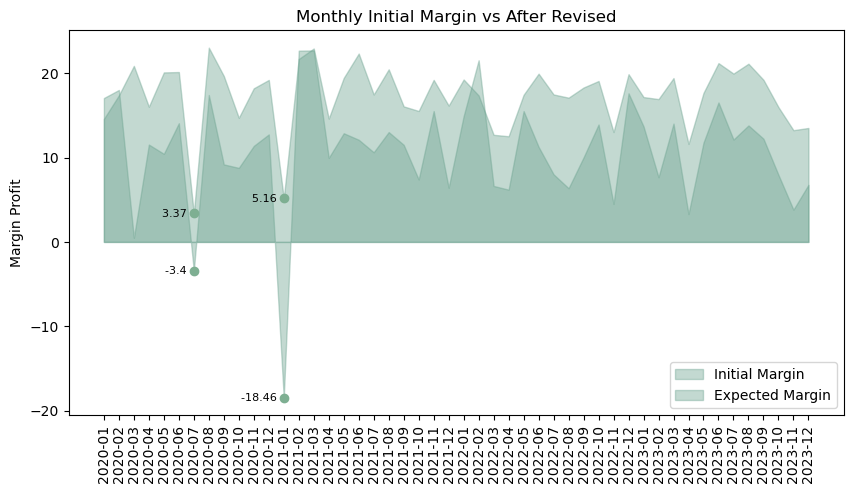

In [119]:
# margin profit differences
margin_calculation = df_negativeProduct.groupby("Monthly Order").sum(numeric_only=True)[["Sales", "Profit", "Expected Profit"]].reset_index()
margin_calculation["Monthly Order"] = margin_calculation["Monthly Order"].astype(str)
margin_calculation["Initial Margin"] = margin_calculation["Profit"] / margin_calculation["Sales"] * 100
margin_calculation["Expected Margin"] = margin_calculation["Expected Profit"] / margin_calculation["Sales"] * 100

# performing area chart
plt.figure(figsize=(10,5))
listMargin = ["Initial Margin", "Expected Margin"]
for margin in listMargin:
    plt.fill_between(margin_calculation["Monthly Order"], margin_calculation[margin], color="#6aa18e", alpha=0.4, label=margin)
    plt.plot(margin_calculation["Monthly Order"], margin_calculation[margin], color="#6aa18e", alpha=0)

# add label to lowest and second lowest margin profit
for margin in listMargin:
    if len(margin_calculation[margin].nsmallest(2)) >= 2:
        min_margin = margin_calculation[margin].min()
        second_lowest_margin = margin_calculation[margin].nsmallest(2).iloc[-1]

        min_margin = margin_calculation[margin].min()
        second_lowest_margin = margin_calculation[margin].nsmallest(2).iloc[-1]

        min_month = margin_calculation.loc[margin_calculation[margin].idxmin(), "Monthly Order"]
        second_lowest_month = margin_calculation.loc[margin_calculation[margin] == second_lowest_margin, "Monthly Order"].values[0]

        plt.text(min_month, min_margin, f"{round(min_margin, 2)}  ", 
                 va="center", 
                 ha="right", 
                 fontsize=8
        )
        plt.text(second_lowest_month, second_lowest_margin, f"{round(second_lowest_margin, 2)}  ", 
                 va="center", 
                 ha="right", 
                 fontsize=8
        )

        plt.scatter(min_month, min_margin, color="#7eaf92")
        plt.scatter(second_lowest_month, second_lowest_margin, color="#7eaf92")

plt.title("Monthly Initial Margin vs After Revised")
plt.legend(loc="lower right")
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Margin Profit")
plt.show()